<a href="https://colab.research.google.com/github/team5INFO5731/INFO5731-FinalProject/blob/main/TopicModelling_on_Scientific_papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TopicModelling on Scientific papers**

In [2]:
''' This would be a long text dataset
This dataset can be downloaded from kaggle,
Data scraped from CNBC contains the headlines, last updated date, and the preview text of articles from the end of December 2017 to July 19th, 2020.
'''
# Load data
import pandas as pd
input_df=pd.read_csv('/content/scientific_articles.csv')
print(input_df.head())

   Unnamed: 0  ...                                          abstarcts
0           0  ...  "... In the context of the appearance-based pa...
1           1  ...  "... We describe latent Dirichlet allocation (...
2           2  ...  "... improvement and tailoring for near-wall t...
3           3  ...  "... We consider the problem of modeling annot...
4           4  ...  "... Linear Discriminant Analysis (LDA) has be...

[5 rows x 3 columns]


In [3]:
# Find the shape of the dataset
input_df.shape

(500, 3)

In [4]:
# Find the basic info of the dataset, to check if there are any null values
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   titles      500 non-null    object
 2   abstarcts   500 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [5]:
#null values are present in the dataset as the shape and nonnull values from the info() dot match
print(input_df.isnull().sum())
# Dropping the null values
input_df=input_df.dropna()

Unnamed: 0    0
titles        0
abstarcts     0
dtype: int64


In [6]:
#steps involving all the basic steps of preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")
# cleaning the text data
input_df['cleaned_data'] = input_df['abstarcts'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
input_df['cleaned_data'] = input_df['cleaned_data'].str.replace(r'\d+',"") #2.To remove Numbers
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split())) #convert the whole text into lower case
input_df['cleaned_data'] = input_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words)) #remove all stop words
#input_df['cleaned text review'] # dataframe column that would be used for further process
input_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,Unnamed: 0,titles,abstarcts,cleaned_data
0,0,\n PCA versus LDA\n,"""... In the context of the appearance-based pa...",context appearance based paradigm object recog...
1,1,\n Latent dirichlet allocatio...,"""... We describe latent Dirichlet allocation (...",describe latent dirichlet allocation lda gener...
2,2,\nLDA\n,"""... improvement and tailoring for near-wall t...",improvement tailoring near wall turbulence
3,3,\n Modeling annotated data\n ...,"""... We consider the problem of modeling annot...",consider problem modeling annotated data data ...
4,4,\n A direct lda algorithm for...,"""... Linear Discriminant Analysis (LDA) has be...",linear discriminant analysis lda successfully ...
...,...,...,...,...
495,495,\n Oscillatory Flow in a Phys...,"""... Laser Doppler anemometry (LDA) ...""",laser doppler anemometry lda
496,496,\n E-selectin and\n ...,"""... a t fi lda iore on ...""",fi lda iore
497,497,\n oro.open.ac.uk Feature LDA...,"""... and other research outputs Feature LDA: a...",research outputs feature lda supervised topic ...
498,498,\n Comparative analysis for d...,"""... Abstract The Linear Discriminant Analysi...",abstract linear discriminant analysis lda wide...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(input_df['cleaned_data']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [8]:
import sys
sys.path.insert(1,'/content/')

**LDA TEXT MODELLING**

In [9]:
import AlgorithmLDA as lda_ul
result = lda_ul.LDA_MODEL(10,tf,tf_feature_names,10)
result

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,latent,53.1,data,46.0,image,39.5,component,12.9,information,30.9,abstract,27.5,recognition,78.0,lda,55.9,note,134.1,lda,134.5
1,topic,52.4,present,25.8,face,39.3,n,12.8,problem,24.4,many,25.3,face,68.0,approach,23.3,implementation,130.1,analysis,99.6
2,lda,48.3,paper,20.4,based,31.7,however,11.9,text,22.8,important,24.6,using,41.1,method,22.3,users,72.1,linear,99.3
3,dirichlet,43.1,using,16.2,features,31.1,two,6.3,classification,22.1,known,22.6,paper,25.1,paper,21.1,using,66.6,discriminant,94.3
4,models,38.0,abstract,15.8,analysis,26.6,principal,5.5,data,21.0,well,22.4,lda,24.9,model,19.2,please,66.1,class,44.9
5,allocation,37.1,lda,15.0,images,23.7,analysis,4.1,research,20.0,used,14.0,new,21.7,system,14.3,read,66.1,paper,32.0
6,model,33.1,model,14.8,component,21.6,interpretation,3.1,large,18.5,methods,11.6,pca,19.5,abstract,14.0,check,66.1,recognition,29.2
7,use,13.3,topic,13.8,method,21.0,space,2.6,abstract,15.2,one,10.7,based,17.3,used,10.7,dependent,65.1,problem,25.8
8,algorithm,12.8,based,11.9,recognition,20.1,model,2.3,feature,15.0,use,9.1,technique,17.0,real,7.9,details,65.1,classification,25.0
9,paper,12.6,analysis,11.5,linear,17.9,purpose,2.1,different,14.1,new,7.3,abstract,16.1,use,5.9,routine,65.1,two,22.0


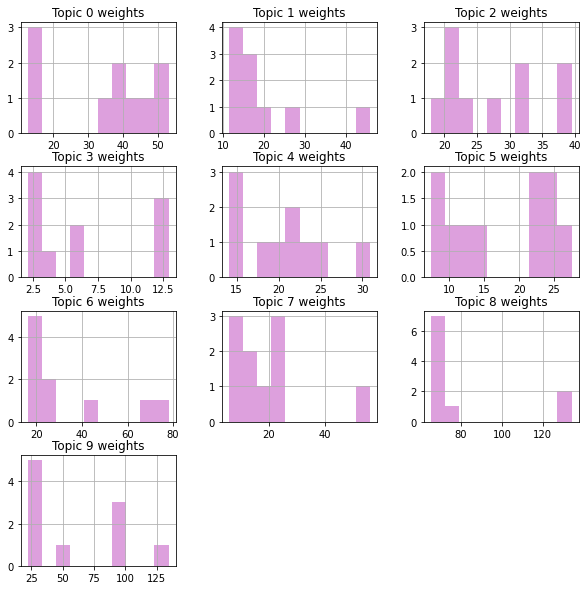

In [11]:
import matplotlib.pyplot as plt
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  result[i] = pd.to_numeric(result[i])
result.hist(figsize=(10,10),color = 'plum')
plt.show(block=False)

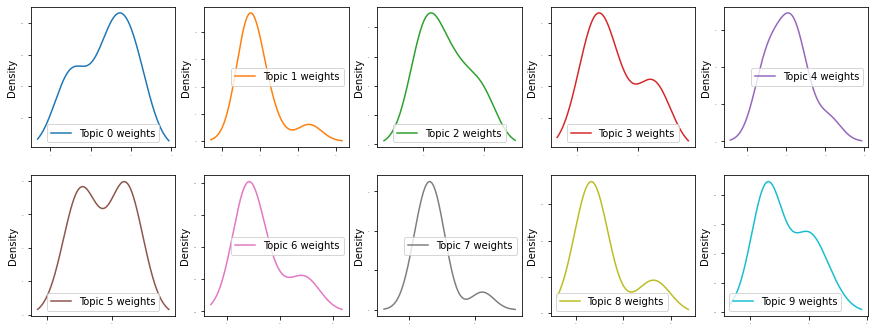

In [12]:
result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

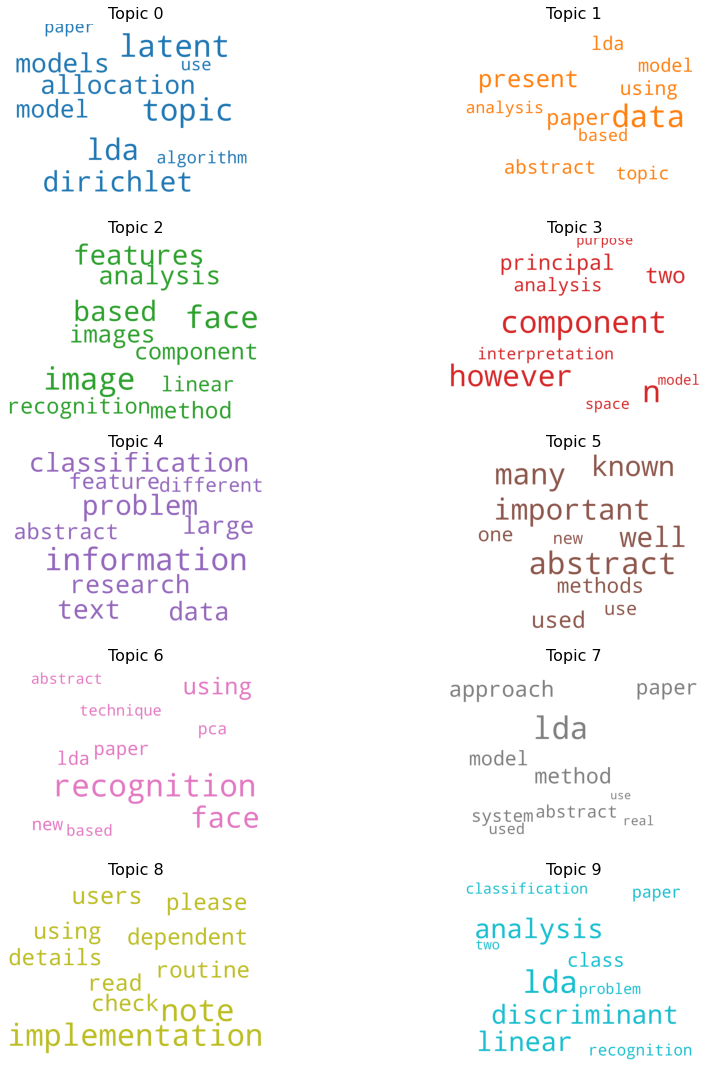

In [13]:
# Wordcloud of Top N words in each topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
my_stopwords = nltk.corpus.stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i)+" words" for i in range(0,10)]
topics = list()

for i in columns_list:
  topics.append(result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]

for i in columns_list:
  frequencies.append(result[i].values)


fig, axes = plt.subplots(5,2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**LSA TOPIC MODELLING**

In [14]:
import AlgorithmLSA as lsa
lsa_result=lsa.LSA_MODEL(tf,vectorizer)
lsa_result

,Topic 0,Topic 0 weights,Topic 1,Topic 1 weights,Topic 2,Topic 2 weights,Topic 3,Topic 3 weights,Topic 4,Topic 4 weights,Topic 5,Topic 5 weights,Topic 6,Topic 6 weights,Topic 7,Topic 7 weights,Topic 8,Topic 8 weights,Topic 9,Topic 9 weights,Topic 10,Topic 10 weights,Topic 11,Topic 11 weights,Topic 12,Topic 12 weights,Topic 13,Topic 13 weights,Topic 14,Topic 14 weights,Topic 15,Topic 15 weights,Topic 16,Topic 16 weights,Topic 17,Topic 17 weights,Topic 18,Topic 18 weights,Topic 19,Topic 19 weights
0,note,0.426927,lda,0.548978,lda,0.479270,linear,0.292554,lda,0.432228,data,0.495276,method,0.361246,image,0.397934,class,0.393131,using,0.391608,paper,0.423477,class,0.382426,model,0.504935,based,0.499925,technique,0.310530,model,0.218552,features,0.382427,n,0.599600,n,0.460634,two,0.443524
1,implementation,0.425012,analysis,0.347615,topic,0.295882,discriminant,0.267459,data,0.272296,classification,0.366208,using,0.289233,data,0.389073,model,0.269119,models,0.318754,pca,0.234210,face,0.326677,data,0.316426,algorithm,0.446022,feature,0.302517,discriminant,0.211849,feature,0.165346,method,0.213752,images,0.242791,text,0.313436
2,using,0.247853,linear,0.280798,model,0.260854,lda,0.241345,recognition,0.225538,abstract,0.334187,based,0.281524,face,0.321262,recognition,0.219808,paper,0.280926,classification,0.183488,abstract,0.299558,method,0.209285,discriminant,0.209223,using,0.269677,present,0.172298,technique,0.137526,features,0.181654,based,0.239776,feature,0.225789
3,users,0.214845,face,0.263059,latent,0.233904,analysis,0.234057,face,0.215585,information,0.218907,image,0.279370,classification,0.096273,problem,0.215295,data,0.243797,models,0.173032,two,0.228395,paper,0.149759,linear,0.181306,well,0.185798,face,0.167241,method,0.136517,paper,0.169705,dimensional,0.167812,information,0.207172
4,please,0.213123,discriminant,0.258496,dirichlet,0.206088,class,0.160376,problem,0.099294,problem,0.167973,paper,0.270083,latent,0.084851,classification,0.212747,topic,0.146441,based,0.169906,paper,0.164292,used,0.130291,technique,0.149494,face,0.143681,models,0.160458,problem,0.134295,matrix,0.154209,data,0.152085,research,0.194067
5,dependent,0.213018,recognition,0.248310,allocation,0.183745,space,0.041269,technique,0.092570,feature,0.161178,classification,0.255953,models,0.082402,topic,0.183880,technique,0.124113,feature,0.151091,technique,0.124467,class,0.120754,known,0.134041,known,0.134899,abstract,0.159502,image,0.132599,text,0.152470,model,0.137713,dimensional,0.190356
6,check,0.212751,paper,0.195293,models,0.181903,classification,0.031063,abstract,0.084298,text,0.159676,features,0.200523,component,0.079319,linear,0.166229,class,0.108936,model,0.129442,based,0.107939,discriminant,0.096963,problem,0.130865,system,0.131101,topic,0.149231,one,0.130574,feature,0.137974,matrix,0.131251,well,0.142096


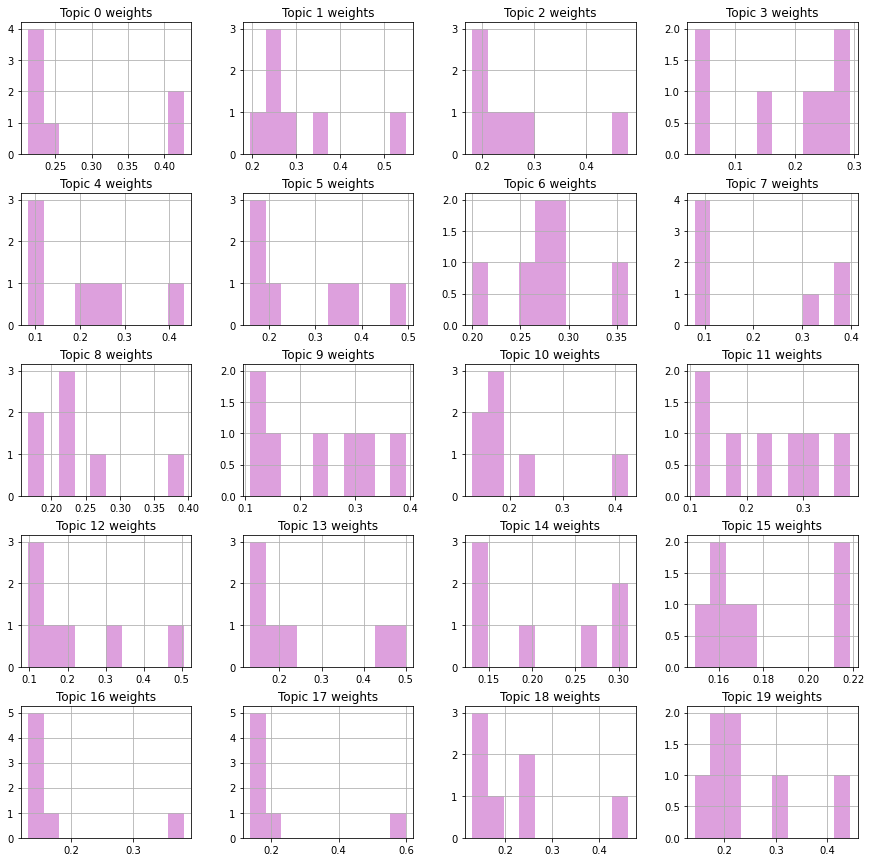

In [16]:
columns_list = ["Topic "+str(i)+" weights" for i in range(0,10)]
for i in columns_list:
  lsa_result[i] = pd.to_numeric(lsa_result[i])
lsa_result.hist(figsize=(15,15),color = 'plum')
plt.show(block=False)

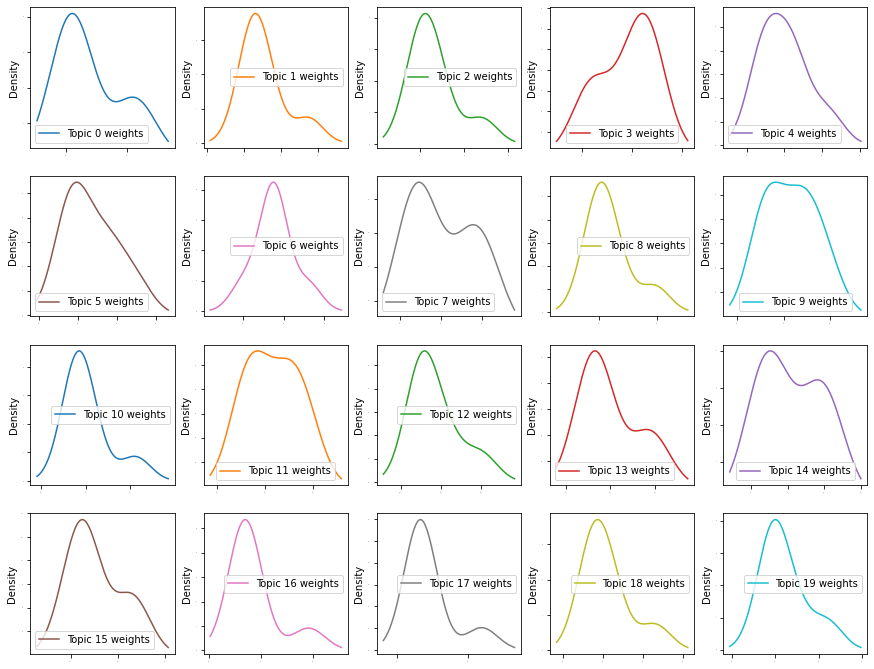

In [17]:
lsa_result.plot(kind='density', subplots=True,layout = (5,5),sharex=False, legend=True, fontsize=1,figsize=(15,15))
plt.show(block=False)

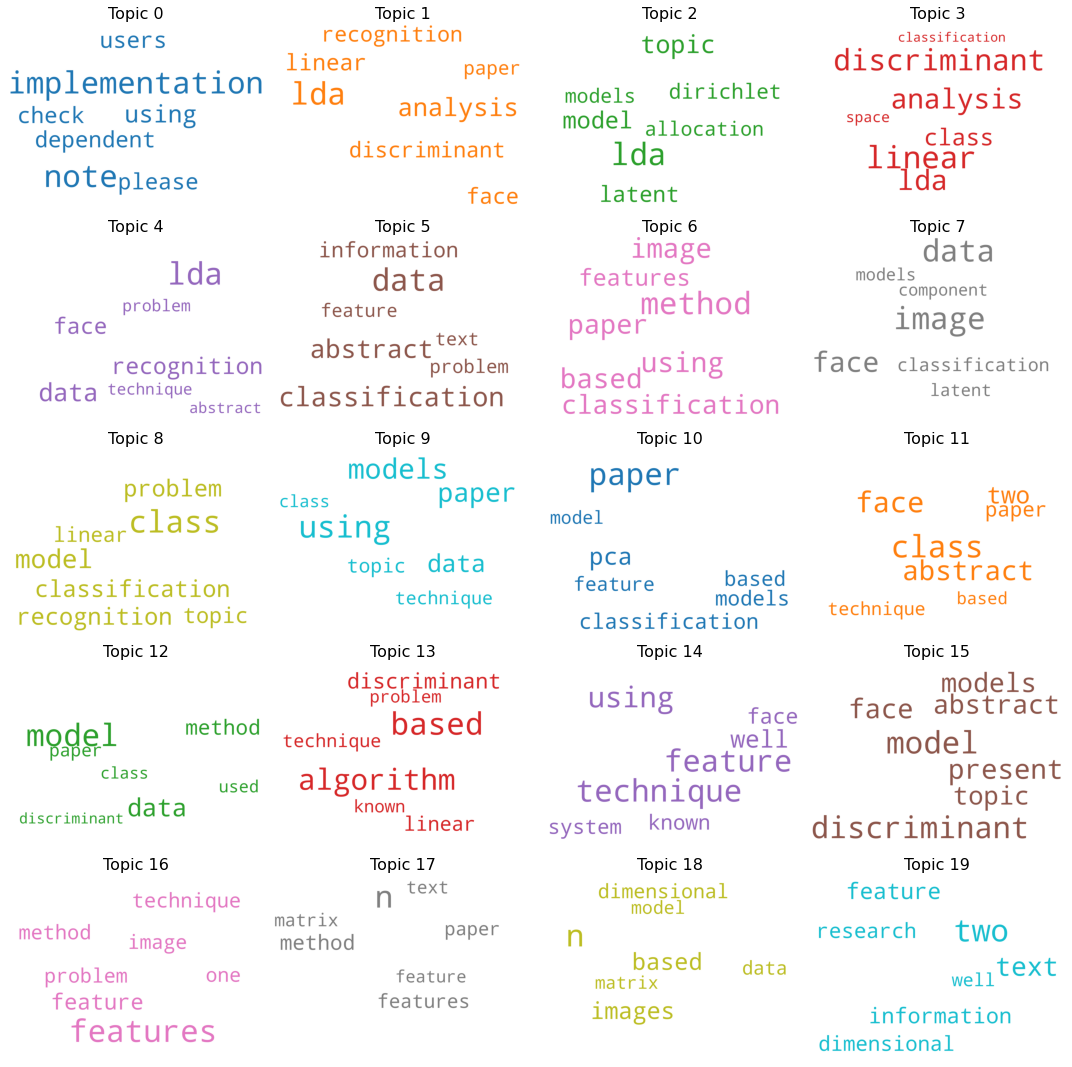

In [18]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols = cols*2
cloud = WordCloud(stopwords=my_stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

columns_list = ["Topic "+str(i) for i in range(0,20)]
topics = list()

for i in columns_list:
  topics.append(lsa_result[i].values)

frequencies = list()
columns_list = ["Topic "+str(i)+" weights" for i in range(0,20)]

for i in columns_list:
  frequencies.append(lsa_result[i].values)


fig, axes = plt.subplots(5,4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    size_of_array = len(topics[i])
    topic_words = dict()
    for j in range(size_of_array):
      topic_words[topics[i][j]] = frequencies[i][j]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**HMM-LDA TOPIC MODELLING**

In [25]:
import AlgorithmHMMLDA as HMMLDA
import numpy as np
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [26]:
def get_reuters_token_list_by_sentence(num_doc,ip):
    corpus = [[i.split() for i in ip ]]
    print(corpus)
    valid_voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')
    valid_voca = valid_voca.union(stop)

    tmp_corpus = list()
    voca_dic = dict()
    voca = list()
    for doc in corpus:
        tmp_doc = list()
        for sent in doc:
            tmp_sent = list()
            for word in sent:
                if word in valid_voca:
                    tmp_sent.append(word)
                    if word not in voca_dic:
                        voca_dic[word] = len(voca_dic)
                        voca.append(word)
            if len(tmp_sent) > 0:
                tmp_doc.append(tmp_sent)
        if len(tmp_doc) > 0:
            tmp_corpus.append(tmp_doc)

    # convert token list to word index list
    corpus = list()
    for doc in tmp_corpus:
        new_doc = list()
        for sent in doc:
            new_sent = list()
            for word in sent:
                new_sent.append(voca_dic[word])
            new_doc.append(new_sent)
        corpus.append(new_doc)

    return np.array(voca), corpus

In [27]:
n_docs = 1000
voca, corpus = get_reuters_token_list_by_sentence(n_docs,input_df["cleaned_data"].values)

[[['context', 'appearance', 'based', 'paradigm', 'object', 'recognition', 'generally', 'believed', 'algorithms', 'based', 'lda', 'linear', 'discriminant', 'analysis', 'superior', 'based', 'pca', 'principal', 'components', 'analysis', 'communication', 'show', 'always', 'case', 'present'], ['describe', 'latent', 'dirichlet', 'allocation', 'lda', 'generative', 'probabilistic', 'model', 'collections', 'discrete', 'data', 'text', 'corpora', 'lda', 'three', 'level', 'hierarchical', 'bayesian', 'model', 'item', 'collection', 'modeled', 'finite', 'mixture', 'underlying', 'set', 'topics', 'topic'], ['improvement', 'tailoring', 'near', 'wall', 'turbulence'], ['consider', 'problem', 'modeling', 'annotated', 'data', 'data', 'multiple', 'types', 'instance', 'one', 'type', 'caption', 'serves', 'description', 'type', 'image', 'describe', 'three', 'hierarchical', 'probabilistic', 'mixture', 'models', 'aimed', 'data', 'culminating', 'cor'], ['linear', 'discriminant', 'analysis', 'lda', 'successfully', 

In [28]:
n_voca = len(voca)
n_topic = 20
n_class = 20
max_iter = 100
model = HMMLDA.HMM_LDA(len(corpus), n_voca, n_topic, n_class, alpha=0.1, beta=0.1, gamma=0.1, eta=0.1, verbose=False)
model.fit(corpus, max_iter=max_iter)

In [29]:
def get_top_words(topic_word_matrix, vocab, topic, n_words=20):
    if not isinstance(vocab, np.ndarray):
        vocab = np.array(vocab)
    top_words = vocab[topic_word_matrix[topic].argsort()[::-1][:n_words]]
    return top_words

In [ ]:
for ti in range(n_topic):
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Topic', ti ,': ', ','.join(top_words))

**Supervised LDA TOPIC MODELLING**

In [ ]:
!pip install pymc

In [ ]:
training_data = input_df['cleaned_data'].values

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import reuters, stopwords
from six.moves import xrange
from collections import Counter
nltk.download('words')

def get_ids_cnt(corpus, max_voca=9999999, remove_top_n=5):
    voca = set(w.lower() for w in nltk.corpus.words.words())
    stop = stopwords.words('english')

    docs = list()
    freq = Counter()

    for doc in corpus:
        if isinstance(doc, str):
            doc = word_tokenize(doc)
        elif not hasattr(doc, '__iter__'):
            raise Exception('Corpus is not a list of string or token list')

        # remove word using stopword list or single character word
        doc = [word.lower() for word in doc if word.lower() in voca and word.lower() not in stop and len(word) != 1]
        freq.update(doc)
        docs.append(doc)

    voca = [key for iter, (key, val) in enumerate(freq.most_common(max_voca)) if iter >= remove_top_n]

    voca_dic = dict()
    voca_list = list()
    for word in voca:
        voca_dic[word] = len(voca_dic)
        voca_list.append(word)

    doc_ids = list()
    doc_cnt = list()

    for doc in docs:
        words = set(doc)
        ids = np.array([int(voca_dic[word]) for word in words if word in voca_dic])
        cnt = np.array([int(doc.count(word)) for word in words if word in voca_dic])

        doc_ids.append(ids)
        doc_cnt.append(cnt)

    return np.array(voca_list), doc_ids, doc_cnt

In [ ]:
voca, word_ids, word_cnt = get_ids_cnt(training_data)

In [ ]:
def convert_cnt_to_list(word_ids, word_cnt):
    corpus = list()

    for di in xrange(len(word_ids)):
        doc = list()
        doc_ids = word_ids[di]
        doc_cnt = word_cnt[di]
        for wi in xrange(len(doc_ids)):
            word_id = doc_ids[wi]
            for si in xrange(doc_cnt[wi]):
                doc.append(word_id)
        corpus.append(doc)
    return corpus

In [ ]:
corpus = convert_cnt_to_list(word_ids, word_cnt)

In [ ]:
import AlgorithmsupervisedLDA as slda

In [ ]:
n_doc = len(corpus)
n_voca = voca.size

In [ ]:
n_doc

In [ ]:
import random
#fit artificial sevearity
sevearity = [random.randint(0,5) for i in range(0,3898)]

In [ ]:
model = slda.SupervisedLDA(n_doc, n_voca, 10, sigma=0.01)
model.fit(corpus, sevearity)

In [ ]:
for ti in model.eta.argsort():
    top_words = get_top_words(model.TW, voca, ti, n_words=10)
    print('Eta', model.eta[ti] ,'\nTopic', ti ,':\t', ','.join(top_words))

**Bi-Term TOPIC MODELLING**

In [ ]:
!pip install biterm

In [ ]:
import sys
sys.path.insert(1,'/content/')
import AlgorithmBITERM as btm_model
topics = btm_model.BITERM_MODEL(tf,vectorizer)

In [ ]:
topics

In [ ]:
texts= input_df['cleaned_data'].values
for i in range(len(texts)):
        print("{} (topic: {})".format(texts[i], topics[i].argmax()))